In [1]:
from MixingTime import *
from numpy.linalg import LinAlgError
import pandas as pd
import pickle
from AnalysisFunctions import *
from RayFunctions import *
import statsmodels.api as sm
import matplotlib.pyplot as plt 

In [2]:
n_districts = 4 ## number of districts
n_nodes = 12 ## number of nodes
n_sims = 30 ## number of simulations

data_name = "./{}nodes_{}dis_{}sims_data.pkl".format(n_nodes, n_districts, n_sims)
graph_name = "{}nodes_{}dis_{}sims_graphs.pkl".format(n_nodes, n_districts, n_sims)

In [3]:
df = pd.read_pickle(data_name)
index = list(df.columns)[:-1]
Y = df['Time']

Meta Edges Regression
                                 OLS Regression Results                                
Dep. Variable:                   Time   R-squared (uncentered):                   0.395
Model:                            OLS   Adj. R-squared (uncentered):              0.374
Method:                 Least Squares   F-statistic:                              18.96
Date:                Tue, 23 Mar 2021   Prob (F-statistic):                    0.000152
Time:                        15:49:39   Log-Likelihood:                         -205.25
No. Observations:                  30   AIC:                                      412.5
Df Residuals:                      29   BIC:                                      413.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

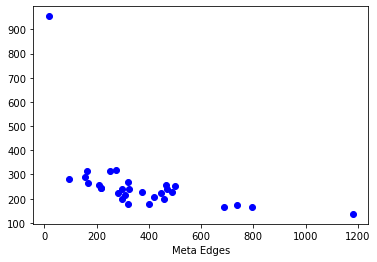

Meta Density Regression
                                 OLS Regression Results                                
Dep. Variable:                   Time   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              338.8
Date:                Tue, 23 Mar 2021   Prob (F-statistic):                    1.54e-17
Time:                        15:49:39   Log-Likelihood:                         -174.70
No. Observations:                  30   AIC:                                      351.4
Df Residuals:                      29   BIC:                                      352.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------

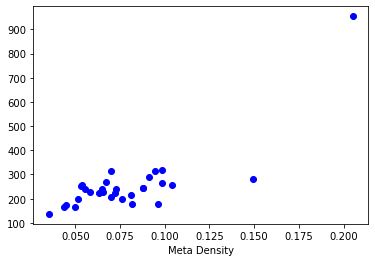

Meta Spanning Trees Regression
                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                      -3.477
Model:                            OLS   Adj. R-squared:                 -3.477
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 23 Mar 2021   Prob (F-statistic):                nan
Time:                        15:49:39   Log-Likelihood:                -212.69
No. Observations:                  30   AIC:                             427.4
Df Residuals:                      29   BIC:                             428.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Met

C:\Users\yuans\anaconda3\envs\SummerResearch\lib\site-packages\statsmodels\regression\linear_model.py:1846: RuntimeWarning: overflow encountered in square
  eigvals = self._wexog_singular_values ** 2
C:\Users\yuans\anaconda3\envs\SummerResearch\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


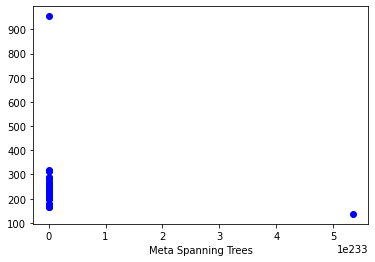

Graph Edges Regression
                                 OLS Regression Results                                
Dep. Variable:                   Time   R-squared (uncentered):                   0.746
Model:                            OLS   Adj. R-squared (uncentered):              0.737
Method:                 Least Squares   F-statistic:                              85.06
Date:                Tue, 23 Mar 2021   Prob (F-statistic):                    4.00e-10
Time:                        15:49:39   Log-Likelihood:                         -192.26
No. Observations:                  30   AIC:                                      386.5
Df Residuals:                      29   BIC:                                      387.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------

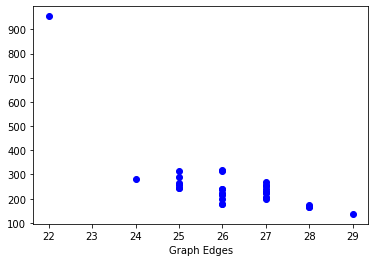

Graph Density Regression
                                 OLS Regression Results                                
Dep. Variable:                   Time   R-squared (uncentered):                   0.746
Model:                            OLS   Adj. R-squared (uncentered):              0.737
Method:                 Least Squares   F-statistic:                              85.06
Date:                Tue, 23 Mar 2021   Prob (F-statistic):                    4.00e-10
Time:                        15:49:39   Log-Likelihood:                         -192.26
No. Observations:                  30   AIC:                                      386.5
Df Residuals:                      29   BIC:                                      387.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------

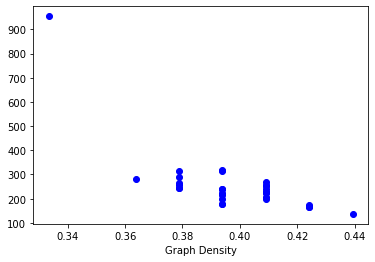

Graph_Spanning Trees Regression
                                 OLS Regression Results                                
Dep. Variable:                   Time   R-squared (uncentered):                   0.325
Model:                            OLS   Adj. R-squared (uncentered):              0.302
Method:                 Least Squares   F-statistic:                              13.97
Date:                Tue, 23 Mar 2021   Prob (F-statistic):                    0.000813
Time:                        15:49:40   Log-Likelihood:                         -206.90
No. Observations:                  30   AIC:                                      415.8
Df Residuals:                      29   BIC:                                      417.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]

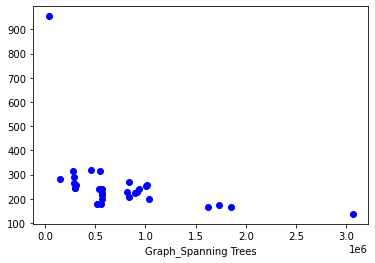

Number of Triangles Regression
                                 OLS Regression Results                                
Dep. Variable:                   Time   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.707
Method:                 Least Squares   F-statistic:                              73.51
Date:                Tue, 23 Mar 2021   Prob (F-statistic):                    1.92e-09
Time:                        15:49:40   Log-Likelihood:                         -193.86
No. Observations:                  30   AIC:                                      389.7
Df Residuals:                      29   BIC:                                      391.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
-

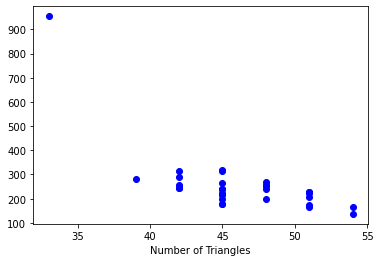

In [4]:
for col in index:
    model = sm.OLS(Y, df[col].astype(float)).fit()
    print_model = model.summary()
    print(col, "Regression")
    print(print_model)
    plt.scatter(df[col], Y, c = 'blue')
    plt.xlabel(col)
    plt.show()